In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import tensorflow
import keras
from sklearn.model_selection import train_test_split

In [66]:
df = pd.read_csv('../Datasets-main/concrete.csv')
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
367,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,28,17.34
183,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,7.68
988,238.0,0.0,0.0,185.0,0.0,1118.0,789.0,28,17.54
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
949,387.0,20.0,94.0,157.0,11.6,938.0,845.0,7,41.67
581,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,180,61.92
846,491.0,26.0,123.0,201.0,3.9,822.0,699.0,3,29.55
478,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,14,21.06
229,425.0,106.3,0.0,151.4,18.6,936.0,803.7,56,64.90
745,290.4,0.0,96.2,168.1,9.4,961.2,865.0,100,48.97


In [67]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [68]:
df.shape

(1030, 9)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assigned X and Y
X = df.drop("strength", axis = 1)
Y = df[["strength"]]

# Split train test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

model = Sequential()

# Units is number of neurons
# Adding input layer
# input_dim is number of independent variables
model.add(Dense(units = 20, activation = "relu", input_dim = 8, kernel_initializer='uniform'))
# Adding hidden layers (Hidden Layers includes input layer but input_dim is passed for input)
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
# Adding output layer
# For multi class use softmax for binary use sigmoid
model.add(Dense(units = 1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, Y_train, batch_size = 10, epochs = 10)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1297.0449 
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 244.1082
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 207.2883
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 191.0261
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 197.4755
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 166.4951
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 170.5547
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 154.9622
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 134.6178
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 139.7552


In [70]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
r2_score(Y_test, Y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.586542898205225

In [71]:
# Standardization Approach
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [72]:
# Standardization for all numerical columns
df["cement"] = std_scale.fit_transform(df[["cement"]])
df["slag"] = std_scale.fit_transform(df[["slag"]])
df["ash"] = std_scale.fit_transform(df[["ash"]])
df["water"] = std_scale.fit_transform(df[["water"]])
df["superplastic"] = std_scale.fit_transform(df[["superplastic"]])
df["coarseagg"] = std_scale.fit_transform(df[["coarseagg"]])
df["fineagg"] = std_scale.fit_transform(df[["fineagg"]])
df["age"] = std_scale.fit_transform(df[["age"]])
df["strength"] = std_scale.fit_transform(df[["strength"]])

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assigned X and Y
X = df.drop("strength", axis = 1)
Y = df[["strength"]]

# Split train test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

model = Sequential()

# Units is number of neurons
# Adding input layer
# input_dim is number of independent variables
model.add(Dense(units = 20, activation = "relu", input_dim = 8, kernel_initializer='uniform'))
# Adding hidden layers (Hidden Layers includes input layer but input_dim is passed for input)
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
# Adding output layer
# For multi class use softmax for binary use sigmoid
model.add(Dense(units = 1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, Y_train, batch_size = 10, epochs = 10)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step - loss: 0.9817 
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 0.6916
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 0.3714
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.2960
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 0.2787
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 0.2299
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.2019
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.1602
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 0.1761
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.1495


In [74]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
r2_score(Y_test, Y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.8452441023350785

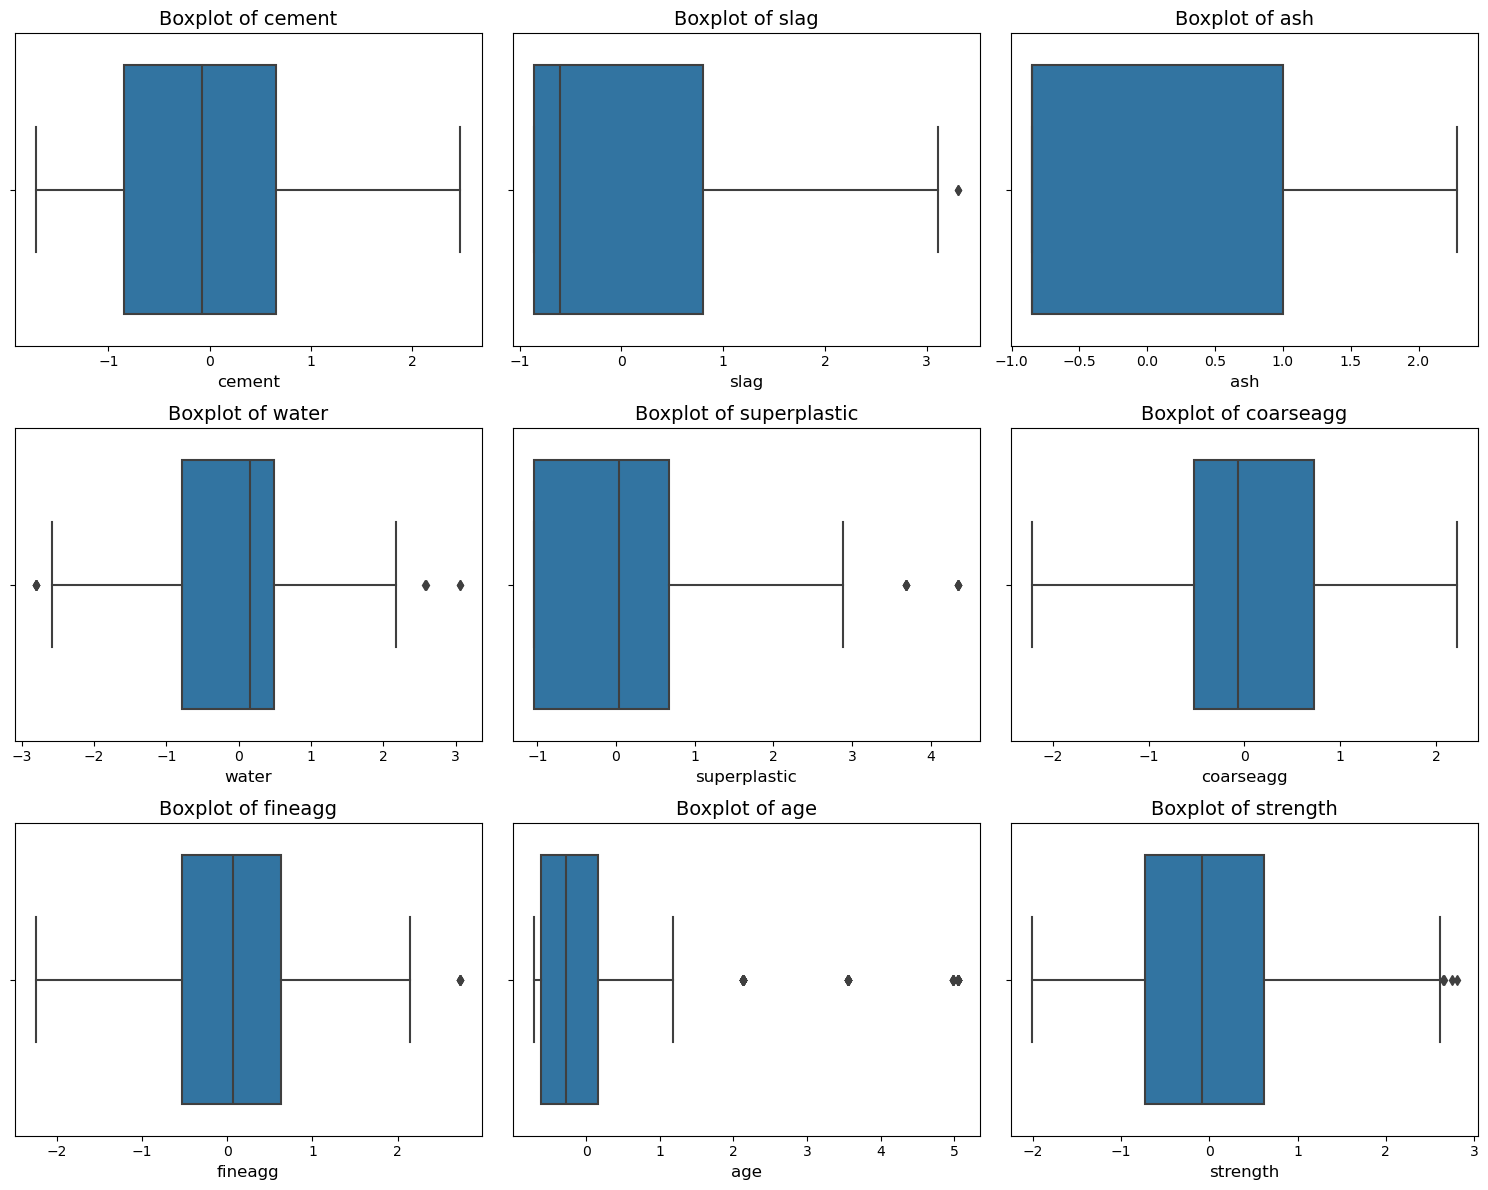

In [75]:
# Remove outliers to improve accuracy
# Define the columns for boxplots
columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes for easier iteration
axes_flat = axes.flatten()

# Loop through each column and plot on each subplot
for i, column in enumerate(columns):
    sns.boxplot(x=column, data=df, ax=axes_flat[i])
    axes_flat[i].set_title(f'Boxplot of {column}', fontsize=14)
    axes_flat[i].set_xlabel(column, fontsize=12)

# Remove any remaining subplots if there are fewer than 9 columns
for j in range(len(columns), len(axes_flat)):
    axes_flat[j].remove()

plt.tight_layout()
plt.show()

In [76]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

In [77]:
lower_range, upper_range = remove_outliers(df["slag"])
df["slag"] = np.where(df["slag"] > upper_range, upper_range, df["slag"])
df["slag"] = np.where(df["slag"] < lower_range, lower_range, df["slag"])

In [78]:
lower_range, upper_range = remove_outliers(df["water"])
df["water"] = np.where(df["water"] > upper_range, upper_range, df["water"])
df["water"] = np.where(df["water"] < lower_range, lower_range, df["water"])

In [79]:
lower_range, upper_range = remove_outliers(df["superplastic"])
df["superplastic"] = np.where(df["superplastic"] > upper_range, upper_range, df["superplastic"])
df["superplastic"] = np.where(df["superplastic"] < lower_range, lower_range, df["superplastic"])

In [80]:
lower_range, upper_range = remove_outliers(df["fineagg"])
df["fineagg"] = np.where(df["fineagg"] > upper_range, upper_range, df["fineagg"])
df["fineagg"] = np.where(df["fineagg"] < lower_range, lower_range, df["fineagg"])

In [81]:
lower_range, upper_range = remove_outliers(df["age"])
df["age"] = np.where(df["age"] > upper_range, upper_range, df["age"])
df["age"] = np.where(df["age"] < lower_range, lower_range, df["age"])

In [82]:
lower_range, upper_range = remove_outliers(df["strength"])
df["strength"] = np.where(df["strength"] > upper_range, upper_range, df["strength"])
df["strength"] = np.where(df["strength"] < lower_range, lower_range, df["strength"])

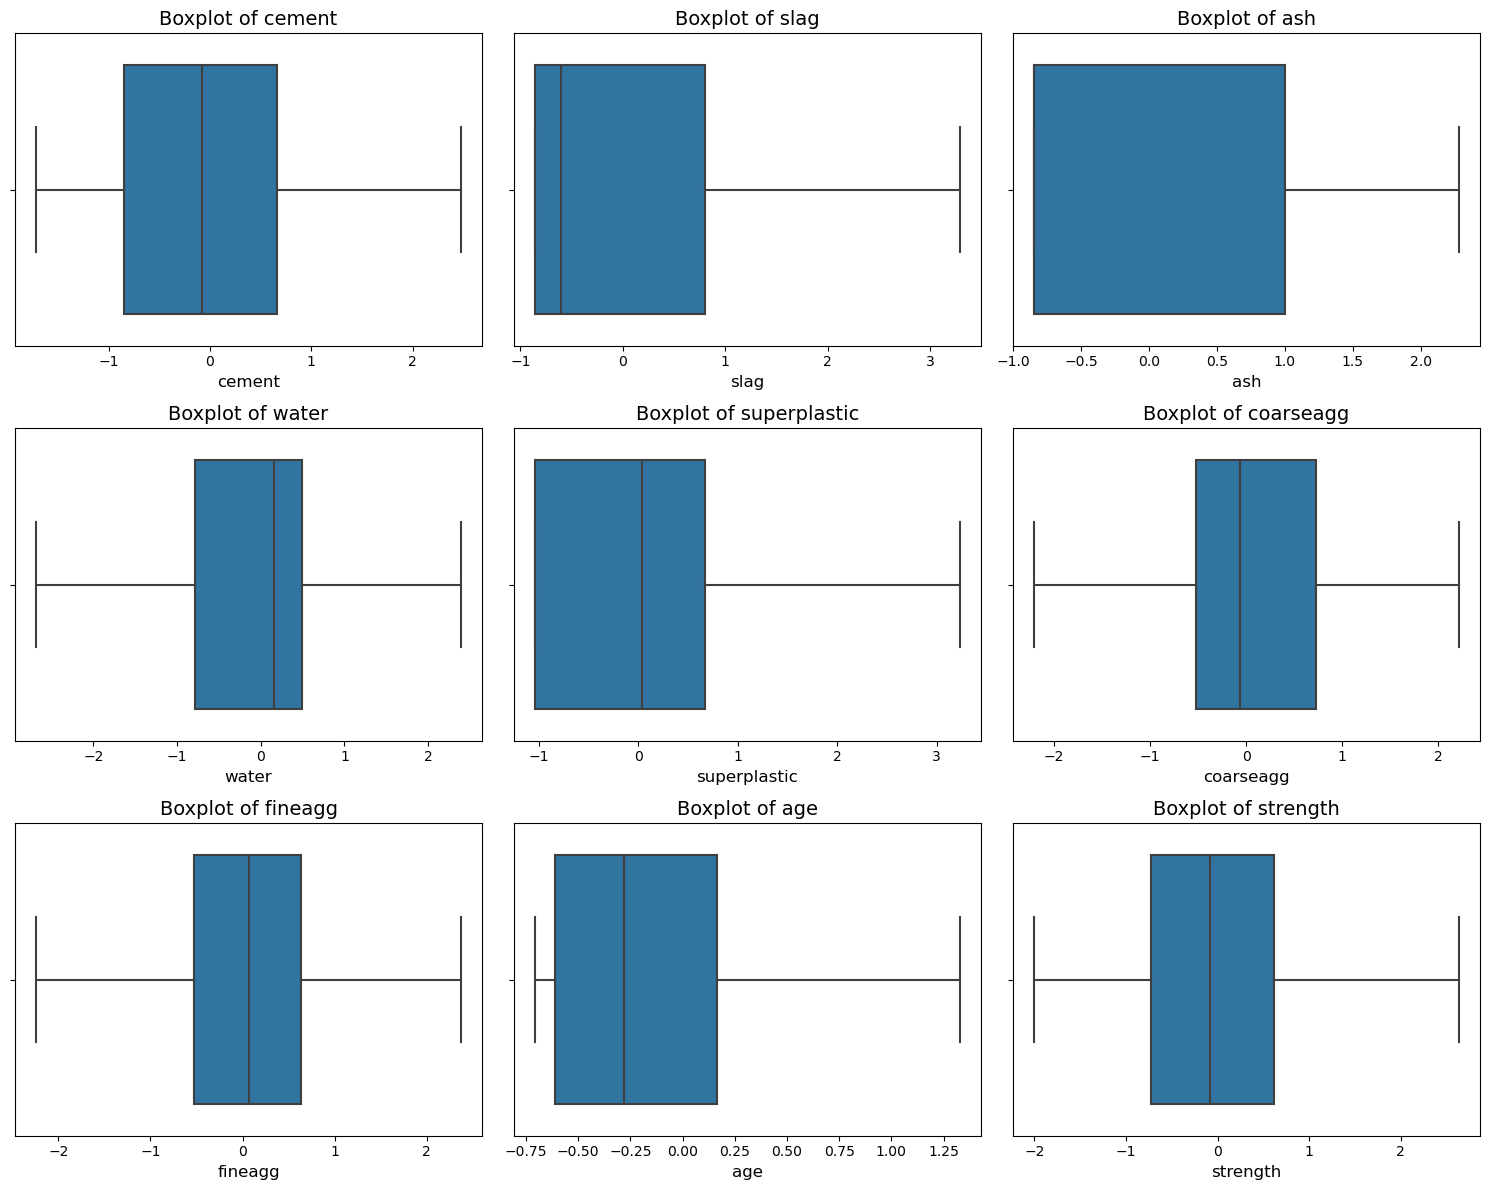

In [83]:
# Define the columns for boxplots
columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes for easier iteration
axes_flat = axes.flatten()

# Loop through each column and plot on each subplot
for i, column in enumerate(columns):
    sns.boxplot(x=column, data=df, ax=axes_flat[i])
    axes_flat[i].set_title(f'Boxplot of {column}', fontsize=14)
    axes_flat[i].set_xlabel(column, fontsize=12)

# Remove any remaining subplots if there are fewer than 9 columns
for j in range(len(columns), len(axes_flat)):
    axes_flat[j].remove()

plt.tight_layout()
plt.show()

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assigned X and Y
X = df.drop("strength", axis = 1)
Y = df[["strength"]]

# Split train test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

model = Sequential()

# Units is number of neurons
# Adding input layer
# input_dim is number of independent variables
model.add(Dense(units = 300, activation = "relu", input_dim = 8, kernel_initializer='uniform'))
# Adding hidden layers (Hidden Layers includes input layer but input_dim is passed for input)
model.add(Dense(units = 50, activation = "relu", kernel_initializer='uniform'))
model.add(Dense(units = 50, activation = "relu", kernel_initializer='uniform'))
model.add(Dense(units = 50, activation = "relu", kernel_initializer='uniform'))
# Adding output layer
# For multi class use softmax for binary use sigmoid
model.add(Dense(units = 1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, Y_train, batch_size = 10, epochs = 10)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - loss: 0.8465 
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.2720
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.2476
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.1768
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.1650
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.1388
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.1189
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.2117
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.1147
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.1212


In [156]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_train)
r2_score(Y_train, Y_pred)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


0.9145311681952837

In [157]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
r2_score(Y_test, Y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


0.8887716598226226